In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
import tensorflow_core
import tensorflow_estimator


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "D:\SOFTWARE\Anaconda\envs\gpu_tf\lib\site-packages\IPython\core\interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-1-ca600a6f5e4b>", line 6, in <module>
    import tensorflow_estimator
  File "D:\SOFTWARE\Anaconda\envs\gpu_tf\lib\site-packages\tensorflow_estimator\__init__.py", line 10, in <module>
    from tensorflow_estimator._api.v1 import estimator
  File "D:\SOFTWARE\Anaconda\envs\gpu_tf\lib\site-packages\tensorflow_estimator\_api\v1\estimator\__init__.py", line 10, in <module>
    from tensorflow_estimator._api.v1.estimator import experimental
  File "D:\SOFTWARE\Anaconda\envs\gpu_tf\lib\site-packages\tensorflow_estimator\_api\v1\estimator\experimental\__init__.py", line 10, in <module>
    from tensorflow_estimator.python.estimator.canned.dnn import dnn_logit_fn_builder
  File "D:\SOFTWARE\Anaconda\envs\gpu_tf\lib\site-packages\tensorflow_estimator\python\estimator\c

In [1]:
# generate data using numpy  :
def generate_data(m):
    angles = np.random.rand(m) * 3 * np.pi/(2-0.5)
    data = np.empty((m,3))
    data[:,0] = np.cos(angles) + np.sin(angles/2 + 0.1 * np.random.randn(m)/2)
    data[:,1] = np.sin(angles) * 0.7 + 0.1 * np.random.randn(m) / 2
    data[:,2] = data[:, 0] * 0.1 + data[:, 1] * 0.3 + 0.1 * np.random.randn(m)
    return data
     
    

In [2]:
x_train = generate_data(100)

ERROR! Session/line number was not unique in database. History logging moved to new session 686


In [3]:
x_train = x_train - x_train.mean(axis=0,keepdims=0)

In [4]:
# Draw the Plots :

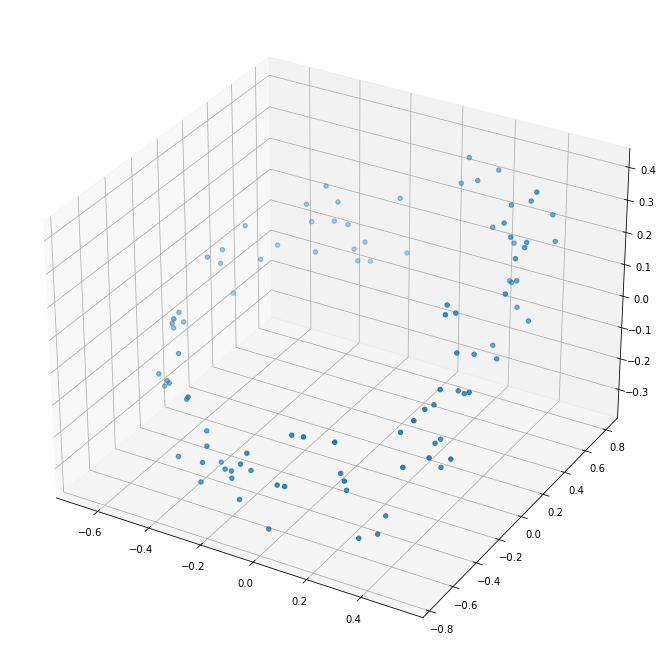

In [5]:
plt.figure(figsize=(14,12))
ax = plt.axes(projection='3d')
ax.scatter3D(x_train[:,0],x_train[:,1],x_train[:,2],cmap='Reds')


In [6]:
# Build The Model :

In [7]:
encoder = keras.models.Sequential([keras.layers.Dense(2,input_shape=[3])])

In [8]:
decoder = keras.models.Sequential([keras.layers.Dense(3,input_shape=[2])])

In [9]:
autoencoder = tf.keras.models.Sequential([encoder,decoder])

In [10]:
# Compile the Model :

In [11]:
autoencoder.compile(loss='mse',optimizer= tf.keras.optimizers.SGD(learning_rate=0.1))


In [12]:
history = autoencoder.fit(x_train,x_train,epochs=200)


Train on 100 samples
Epoch 1/200
100/100 [==============================] - 1s 9ms/sample - loss: 0.0710
Epoch 2/200
100/100 [==============================] - 0s 206us/sample - loss: 0.0644
Epoch 3/200
100/100 [==============================] - 0s 217us/sample - loss: 0.0589
Epoch 4/200
100/100 [==============================] - 0s 219us/sample - loss: 0.0544
Epoch 5/200
100/100 [==============================] - 0s 233us/sample - loss: 0.0504
Epoch 6/200
100/100 [==============================] - 0s 220us/sample - loss: 0.0460
Epoch 7/200
100/100 [==============================] - 0s 229us/sample - loss: 0.0429
Epoch 8/200
100/100 [==============================] - 0s 233us/sample - loss: 0.0400
Epoch 9/200
100/100 [==============================] - 0s 209us/sample - loss: 0.0371
Epoch 10/200
100/100 [==============================] - 0s 203us/sample - loss: 0.0346
Epoch 11/200
100/100 [==============================] - 0s 231us/sample - loss: 0.0319
Epoch 12/200
100/100 [===========

In [13]:
codings = encoder.predict(x_train)

In [14]:
print("Input point : ",x_train[0])
print("Ecoding Output : ",codings[0])

Input point :  [0.34558315 0.05336948 0.15555791]
Ecoding Output :  [ 0.37573248 -0.23344736]


In [15]:
#  Plot the Encoded-Output :

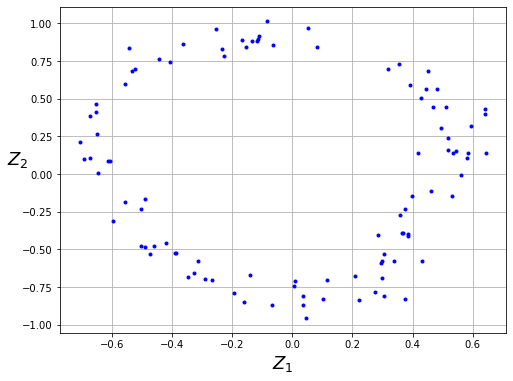

In [16]:
plt.figure(figsize=(8,6))
plt.plot(codings[:,0],codings[:,1],'b.')
plt.xlabel("$Z_1$",fontsize=18)
plt.ylabel("$Z_2$",fontsize=18,rotation=0)
plt.grid(True)
plt.show()


In [17]:
# Decode the Encoder Prediction :

In [18]:
decoding = decoder.predict(codings)

In [19]:
# Plots the Decoder Output :

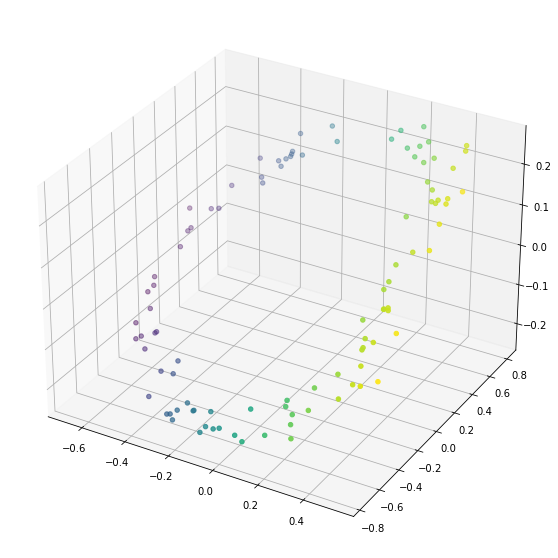

In [23]:
plt.figure(figsize=(14,10))
ax = plt.axes(projection='3d')
ax.scatter3D(decoding[:,0],decoding[:,1],decoding[:,2],c=decoding[:,0])